# Problem Statement

### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

### The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

### Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

# Goal

### There are quite a few goals for this case study.

### Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Lead_data= pd.read_csv("Leads.csv")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
Lead_data.shape

(9240, 37)

In [7]:
Lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#Converting 'Select' values to NaN.
Lead_data = Lead_data.replace('Select', np.nan)

In [9]:
Lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### We need to find null value percentage so we can delete the data. 

In [10]:
round(Lead_data.isnull().sum()/len(Lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

#### We see some columns having more than 40 percentage having null values this columns not useful for us hence we can drop them for further analysis

In [11]:
##droping the columns with higher missing values

Lead_data = Lead_data.drop(columns=['Lead Quality','Lead Profile','How did you hear about X Education','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])

In [12]:
Lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [13]:
round(Lead_data.isnull().sum()/len(Lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

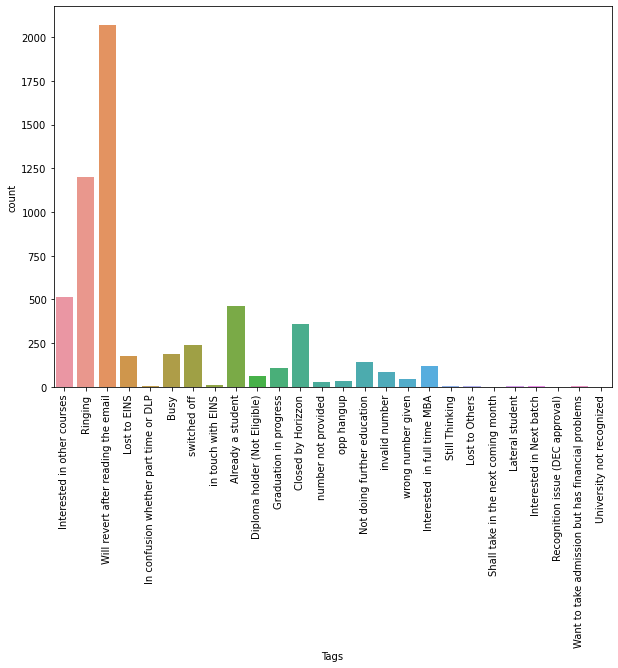

In [14]:
#Tags have 36        % missing values

plt.figure(figsize=(10,7))
sns.countplot(Lead_data['Tags'])
plt.xticks(rotation=90)

#### Since we are get most of 'Will revert after reading the email' so we can impute missing values in this column with this value.

In [15]:
Lead_data['Tags']=Lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

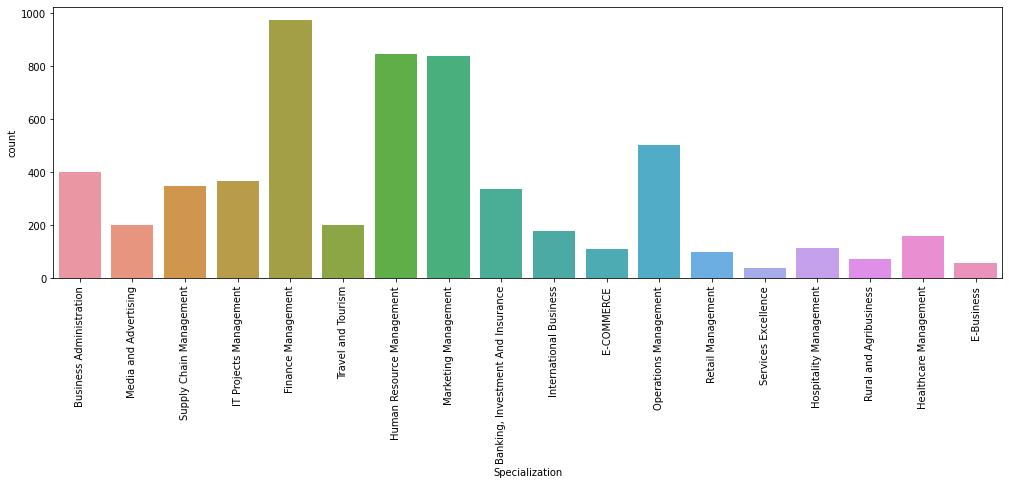

In [16]:
plt.figure(figsize=(17,5))
sns.countplot(Lead_data['Specialization'])
plt.xticks(rotation=90)

#### Observation - There is 37% missing data in the specialization columns it may be lead is student or did not have specialization mentioned in the selection criteria, so we will add those 37% to others category.

In [17]:
Lead_data['Specialization'] = Lead_data['Specialization'].replace(np.nan, 'Others')

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

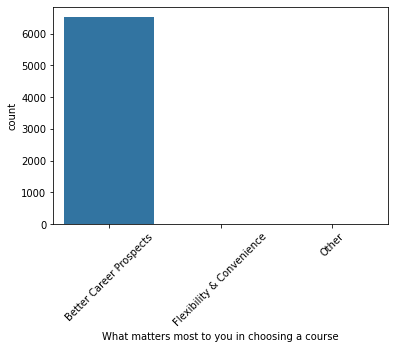

In [18]:
sns.countplot(Lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation=45)

##### We can delete the column 'What matters most to you in choosing a course' it gives only one option that almost every lead select the same reason we need not need this columns for further analysis.

In [19]:
Lead_data=Lead_data.drop('What matters most to you in choosing a course',axis=1)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

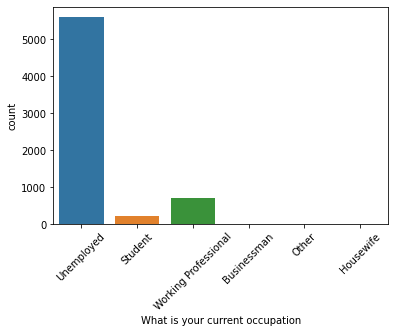

In [20]:
sns.countplot(Lead_data['What is your current occupation'])
plt.xticks(rotation=45)

In [21]:
round(Lead_data['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

##### Most of data is indicating into unemployed section hence missing values we can consider it to unemployed section 

In [22]:
Lead_data['What is your current occupation']=Lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

##### Column City
####This column have 40% null values

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

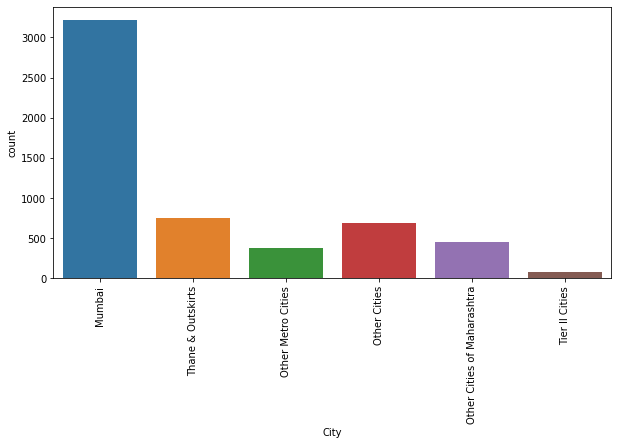

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(Lead_data['City'])
plt.xticks(rotation=90)

In [24]:
round(Lead_data.isnull().sum()/len(Lead_data.index),2)*100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                     27.0
Specialization                               0.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

#### country column is also having 27% null values 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

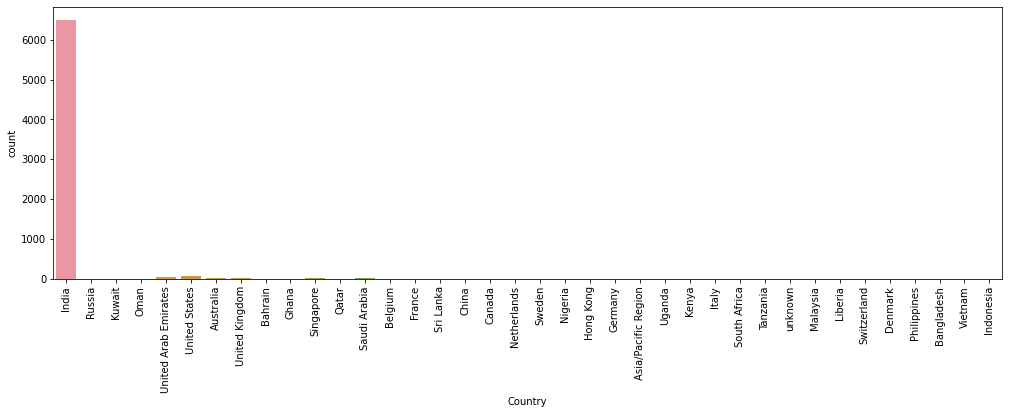

In [25]:
plt.figure(figsize=(17,5))
sns.countplot(Lead_data['Country'])
plt.xticks(rotation=90)

#### As per the Graph we can identify most of counts are from India so we can impute other missing values to India

In [26]:
Lead_data['Country']=Lead_data['Country'].replace(np.nan,'India')

In [27]:
round(Lead_data.isnull().sum()/len(Lead_data.index),2)*100

Prospect ID                                  0.0
Lead Number                                  0.0
Lead Origin                                  0.0
Lead Source                                  0.0
Do Not Email                                 0.0
Do Not Call                                  0.0
Converted                                    0.0
TotalVisits                                  1.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         1.0
Last Activity                                1.0
Country                                      0.0
Specialization                               0.0
What is your current occupation              0.0
Search                                       0.0
Magazine                                     0.0
Newspaper Article                            0.0
X Education Forums                           0.0
Newspaper                                    0.0
Digital Advertisement                        0.0
Through Recommendati

##### so other columns having less than 2% of missing values so we can drop them

In [28]:
Lead_data.dropna(inplace = True)

In [29]:
round(Lead_data.isnull().sum()/len(Lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [30]:
# Percentage of rows retained 
(len(Lead_data.index)/9240)*100

59.51298701298702

##### Now we do not have any blank or null values in dataset

# Exploratory Data Analytics

### Identify the Duplicates

In [31]:
Lead_data[Lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


##### yes there is no duplicates found in the dataset

### Univariate Analysis and Bivariate Analysis

### 1) Converted Column

In [32]:
Converted = (sum(Lead_data['Converted'])/len(Lead_data['Converted'].index))*100
Converted

41.02564102564102

#### Lead conversion rate is 41%

### 2) Lead Origin

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Landing Page Submission'),
  Text(1, 0, 'API'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

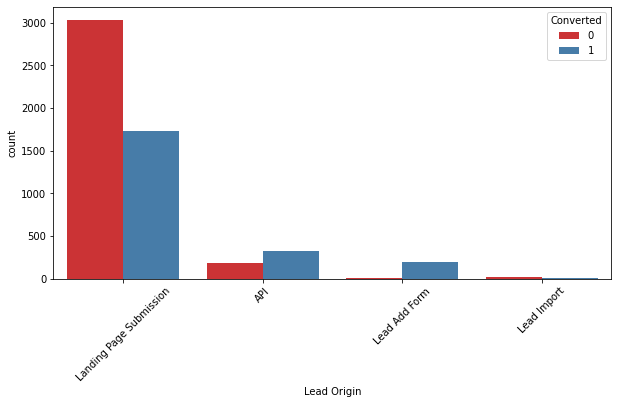

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 45)

# observations

1) API and Landing page Submission has submissive upto 30 -35% conversion rate but count of leads are considerable
2) Lead Add Form has nearby 90% conversion rate but count of lead are not very high.
3) Lead Import count are very less


### To improve overall lead conversion rate we need to focus of Api & Landing Page Submission also from Lead add from

### 3) Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Direct Traffic'),
  Text(1, 0, 'Google'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Referral Sites'),
  Text(4, 0, 'Olark Chat'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'Pay per Click Ads'),
  Text(10, 0, 'bing'),
  Text(11, 0, 'WeLearn'),
  Text(12, 0, 'Click2call'),
  Text(13, 0, 'welearnblog_Home'),
  Text(14, 0, 'testone'),
  Text(15, 0, 'Press_Release'),
  Text(16, 0, 'Social Media'),
  Text(17, 0, 'NC_EDM')])

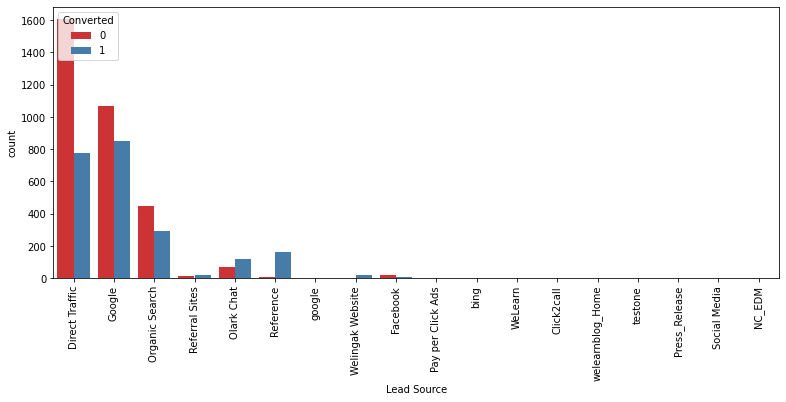

In [34]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = Lead_data, palette='Set1')
plt.xticks(rotation = 90)

In [35]:
Lead_data['Lead Source'] = Lead_data['Lead Source'].replace(['google'], 'Google')

In [36]:
Lead_data['Lead Source'] = Lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Direct Traffic'),
  Text(1, 0, 'Google'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Referral Sites'),
  Text(4, 0, 'Olark Chat'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

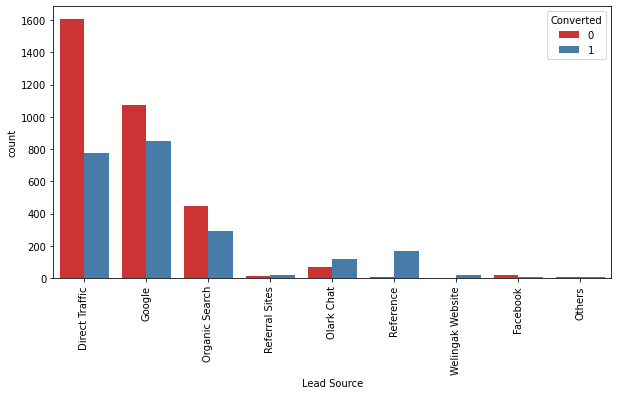

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Observations

#### 1) Google and direct traffic modes convert the maximum leads.
#### 2) Reference & Welingak website from this mode we are getting maximum conversion of leads.

#### To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

### 4) Do not Email

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

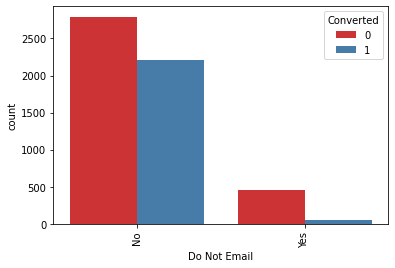

In [38]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Observation- Most of the output is no hence we can not conclude anything from this column

### 5) Do not call

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

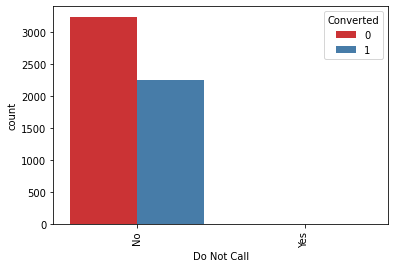

In [39]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Observation - This column is also showing most of no hence we can not conclude anything from this

### 6) TotalVisits

In [40]:
Lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    5499.000000
mean        4.563921
std         5.568716
min         0.000000
5%          0.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        19.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

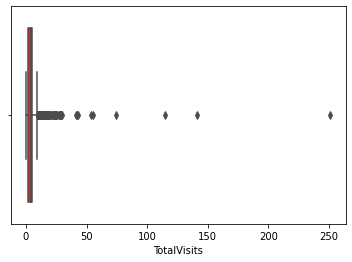

In [41]:
sns.boxplot(Lead_data['TotalVisits'],orient='vert',palette='Set1')

##### Observation- as we can see there is outlier in this column so we can cap the 95% value for analysis purpose.

In [42]:
percentiles = Lead_data['TotalVisits'].quantile([0.05,0.95]).values
Lead_data['TotalVisits'][Lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
Lead_data['TotalVisits'][Lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

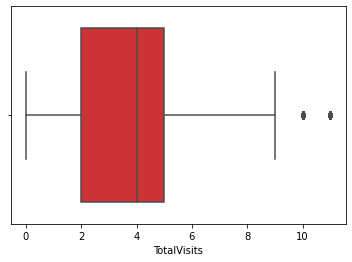

In [43]:
sns.boxplot(Lead_data['TotalVisits'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

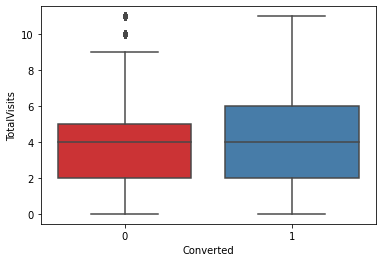

In [44]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Lead_data,palette='Set1')

##### Observation - Median of converted and not converted are the same hence we can not conclude from this column

### 7) Total Time Spent on Website

<AxesSubplot:xlabel='Total Time Spent on Website'>

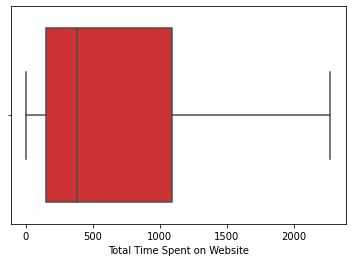

In [45]:
Lead_data['Total Time Spent on Website'].describe()
sns.boxplot(Lead_data['Total Time Spent on Website'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

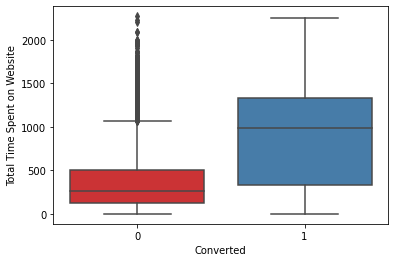

In [46]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Lead_data,palette='Set1')

#### Observation - Leads who are spending more time on website most likely to be converted Hence Website should be more engaging 

### 8) Page Views Per Visit

In [47]:
Lead_data['Page Views Per Visit'].describe()

count    5499.000000
mean        3.125772
std         2.062951
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

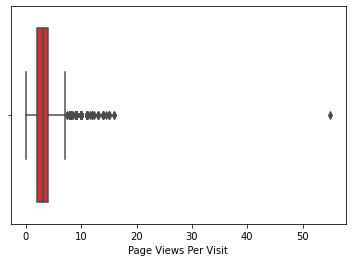

In [48]:
sns.boxplot(Lead_data['Page Views Per Visit'],orient='vert',palette='Set1')

#### Here we have see the outliers in that data so we need to cap 95% of data on analysis.

In [49]:
percentiles = Lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
Lead_data['Page Views Per Visit'][Lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
Lead_data['Page Views Per Visit'][Lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

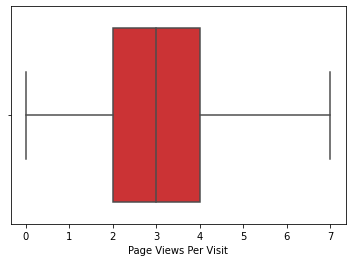

In [50]:
sns.boxplot(Lead_data['Page Views Per Visit'],palette='Set1',orient='vert')

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

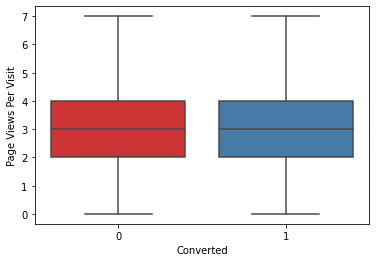

In [51]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =Lead_data,palette='Set1')

##### Observartion - Median for converted and non converted are the same hence we can not conclude anything from page views

### 9) Last Activity

In [52]:
Lead_data['Last Activity'].describe()

count             5499
unique              16
top       Email Opened
freq              2306
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Email Opened'),
  Text(1, 0, 'Unreachable'),
  Text(2, 0, 'Converted to Lead'),
  Text(3, 0, 'Page Visited on Website'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Form Submitted on Website'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Email Bounced'),
  Text(9, 0, 'Olark Chat Conversation'),
  Text(10, 0, 'SMS Sent'),
  Text(11, 0, 'Visited Booth in Tradeshow'),
  Text(12, 0, 'Approached upfront'),
  Text(13, 0, 'View in browser link Clicked'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

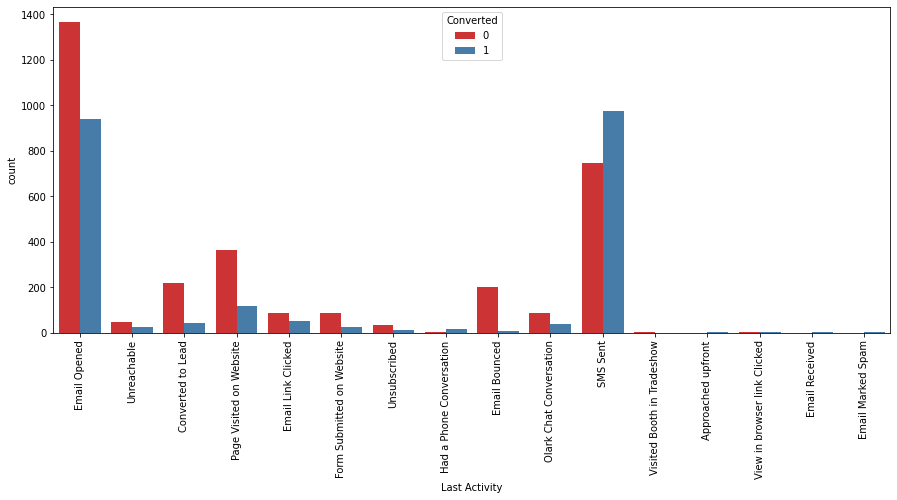

In [53]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [54]:
Lead_data['Last Activity'] = Lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Email Opened'),
  Text(1, 0, 'Unreachable'),
  Text(2, 0, 'Converted to Lead'),
  Text(3, 0, 'Page Visited on Website'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Form Submitted on Website'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Other_Activity'),
  Text(8, 0, 'Email Bounced'),
  Text(9, 0, 'Olark Chat Conversation'),
  Text(10, 0, 'SMS Sent')])

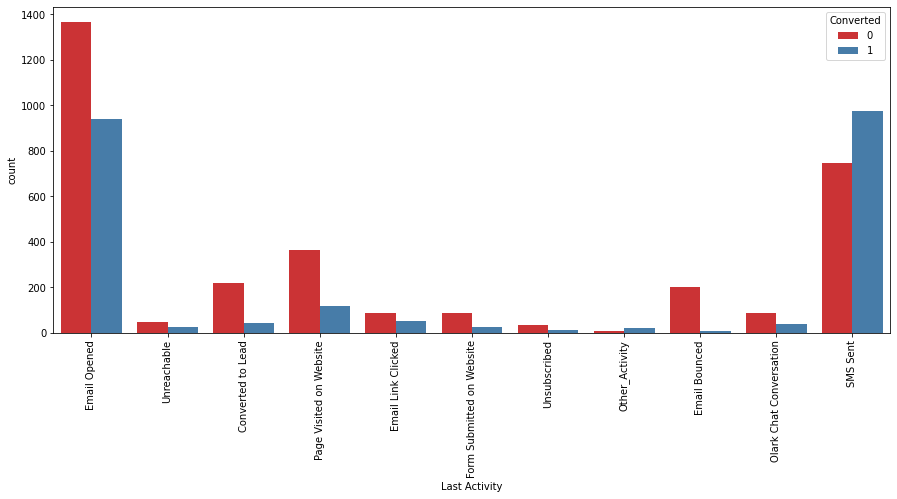

In [55]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

##### Observation - Most of the lead have their Email opened as their last activity.Conversion rate for leads with last activity as SMS Sent is almost 60%.

### 10) Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Kuwait'),
  Text(2, 0, 'Oman'),
  Text(3, 0, 'United States'),
  Text(4, 0, 'Bahrain'),
  Text(5, 0, 'Singapore'),
  Text(6, 0, 'United Kingdom'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Australia'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Saudi Arabia'),
  Text(11, 0, 'United Arab Emirates'),
  Text(12, 0, 'Belgium'),
  Text(13, 0, 'France'),
  Text(14, 0, 'China'),
  Text(15, 0, 'Canada'),
  Text(16, 0, 'Netherlands'),
  Text(17, 0, 'Nigeria'),
  Text(18, 0, 'Hong Kong'),
  Text(19, 0, 'Germany'),
  Text(20, 0, 'Uganda'),
  Text(21, 0, 'Sweden'),
  Text(22, 0, 'Kenya'),
  Text(23, 0, 'South Africa'),
  Text(24, 0, 'Tanzania'),
  Text(25, 0, 'Malaysia'),
  Text(26, 0, 'Liberia'),
  Text(27, 0, 'Italy'),
  Text(28, 0, 'Switzerland'),
  Text(29, 0, 'Denmark'),
  Text(30, 0, 'Philippines'),
  Text(31, 0, 

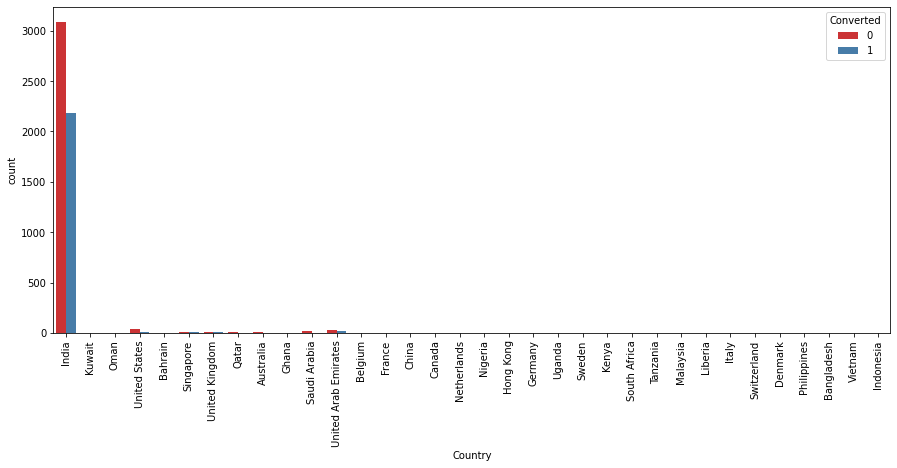

In [56]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

##### Observation- The count for the country is India hence it is same can not conclude from anything

### 11) Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

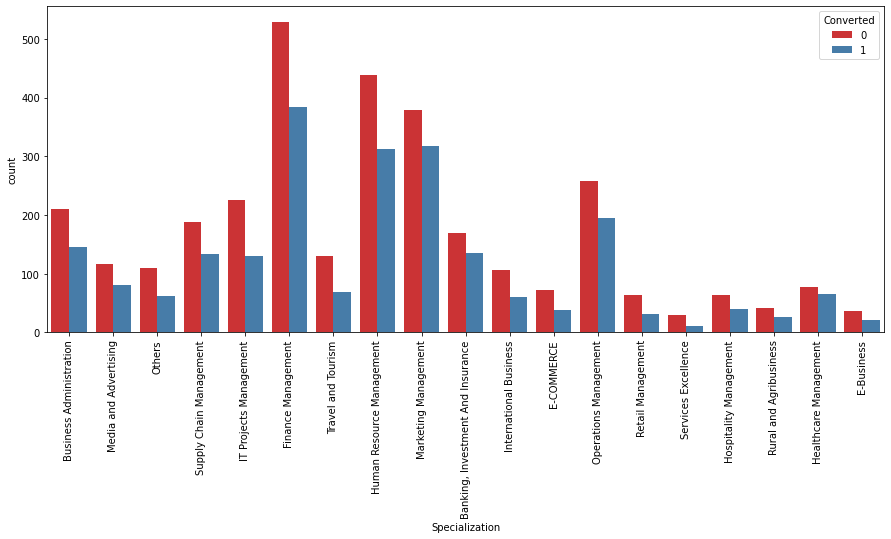

In [57]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

##### Observation - focus should be more on high conversion rate

### 12) What is your current occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Student'),
  Text(1, 0, 'Unemployed'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Housewife'),
  Text(4, 0, 'Businessman'),
  Text(5, 0, 'Other')])

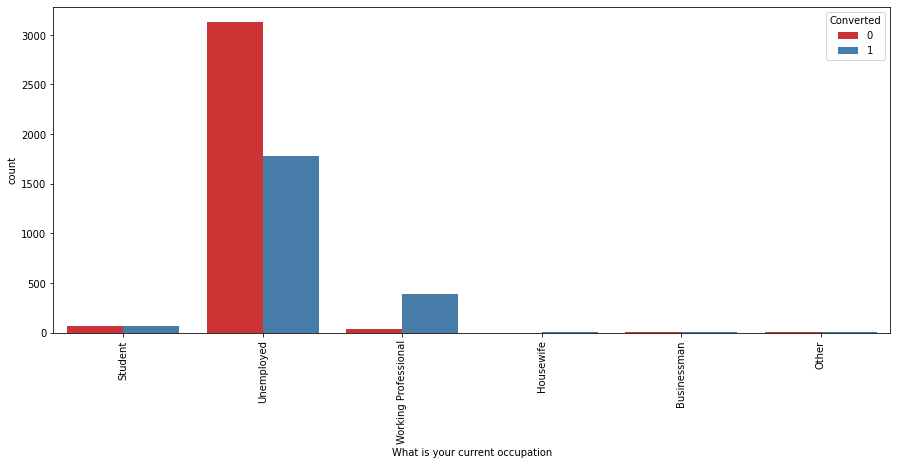

In [58]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

Observation - 1) Working professional have high chances to convert the lead
              2) Unemployed leads have more count but conversion rate is nearby 30-35% 

### 13) Search

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

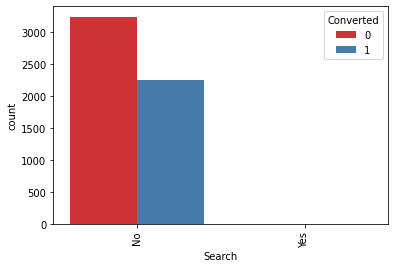

In [59]:
sns.countplot(x = "Search", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [60]:
Observation- The data shows mostly no hence we can not conclusion from this.

SyntaxError: ignored

### 14) Magazine

(array([0]), [Text(0, 0, 'No')])

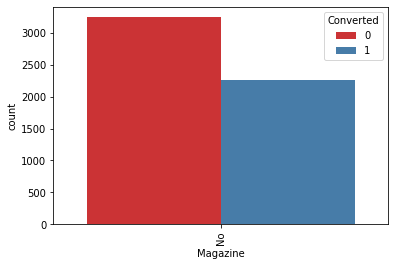

In [61]:
sns.countplot(x = "Magazine", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [ ]:
Observation- The data shows mostly no hence we can not conclusion from this.

### 15) Newspaper Article

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

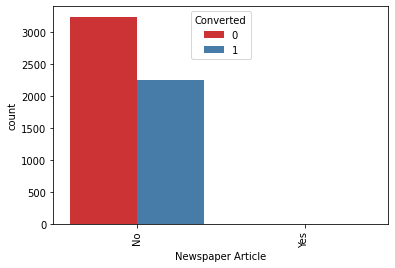

In [63]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [64]:
Observation- The data shows mostly no hence we can not conclusion from this.

SyntaxError: ignored

### 16) X Education Forums

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

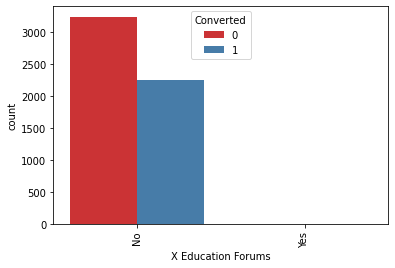

In [65]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [66]:
###Observation- The data shows mostly no hence we can not conclusion from this.

### 17) Newspaper

(array([0]), [Text(0, 0, 'No')])

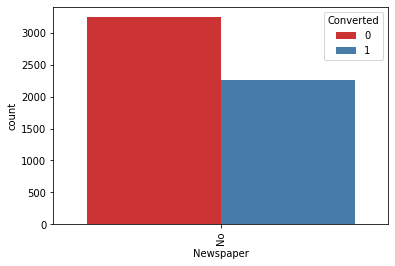

In [67]:
sns.countplot(x = "Newspaper", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [68]:
Observation- The data shows mostly no hence we can not conclusion from this.

SyntaxError: ignored

### 18) Digital Advertisement

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

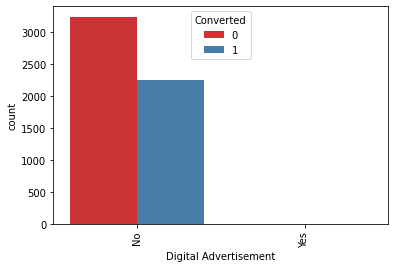

In [69]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [70]:
Observation- The data shows mostly no hence we can not conclusion from this.

SyntaxError: ignored

### 19) Through Recommendations

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

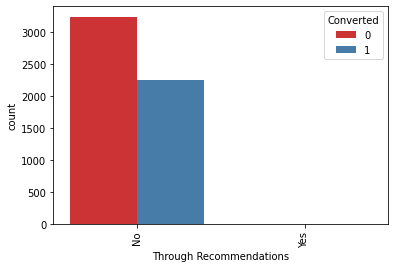

In [71]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [72]:
Observation- The data shows mostly no hence we can not conclusion from this.

SyntaxError: ignored

### 20) Receive More Updates About Our Courses

(array([0]), [Text(0, 0, 'No')])

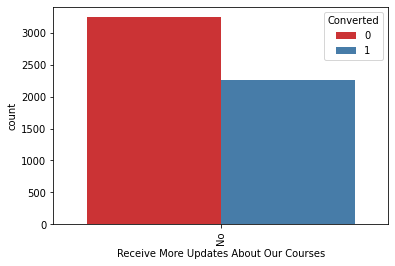

In [73]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [74]:
Observation- The data shows mostly no hence we can not conclusion from this.

SyntaxError: ignored

### 21) Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Will revert after reading the email'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Lost to EINS'),
  Text(3, 0, 'Interested in other courses'),
  Text(4, 0, 'Busy'),
  Text(5, 0, 'switched off'),
  Text(6, 0, 'in touch with EINS'),
  Text(7, 0, 'Already a student'),
  Text(8, 0, 'Diploma holder (Not Eligible)'),
  Text(9, 0, 'Graduation in progress'),
  Text(10, 0, 'number not provided'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'Not doing further education'),
  Text(13, 0, 'invalid number'),
  Text(14, 0, 'Interested  in full time MBA'),
  Text(15, 0, 'wrong number given'),
  Text(16, 0, 'opp hangup'),
  Text(17, 0, 'Still Thinking'),
  Text(18, 0, 'Lost to Others'),
  Text(19, 0, 'Shall take in the next coming month'),
  Text(20, 0, 'Interested in Next batch'),
  Text(21, 0, 'Recognition issue (DEC approval)'),
  Text(22, 0, 'Want to take admission 

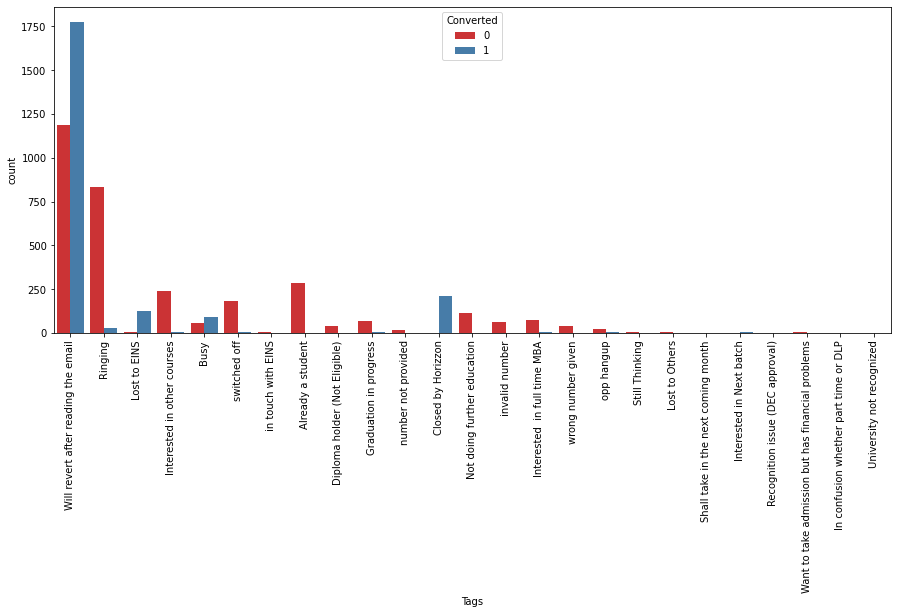

In [75]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Observartion- This column is created by sales team for their own analysis hence we can not use this for model building  hence we need to drop this column

### 22) Update me on Supply Chain Content

(array([0]), [Text(0, 0, 'No')])

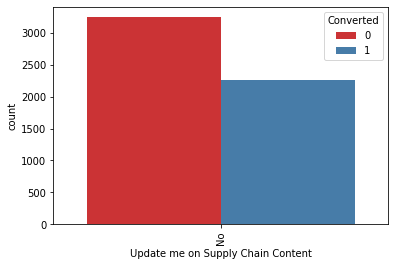

In [76]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [77]:
##Observation- The data shows mostly no hence we can not conclusion from this.

### 23) Get updates on DM Content

(array([0]), [Text(0, 0, 'No')])

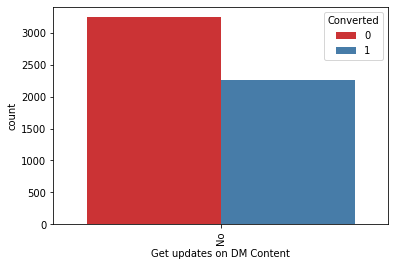

In [78]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [79]:
##Observation- The data shows mostly no hence we can not conclusion from this.

### 24) City

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

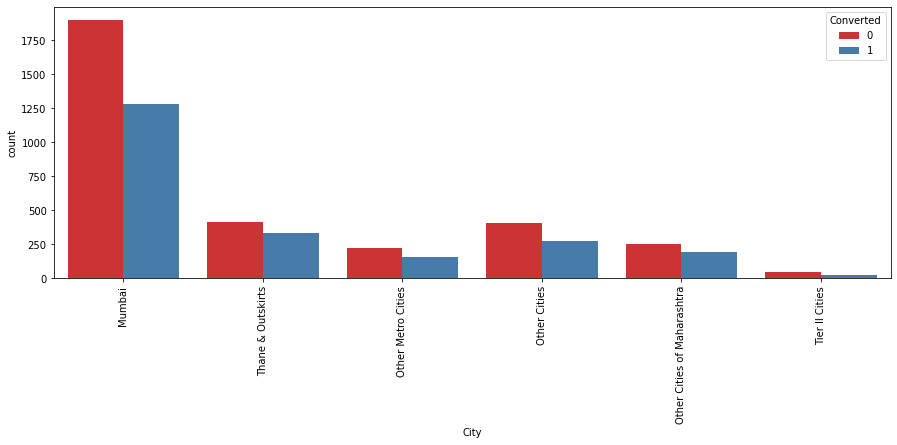

In [80]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [81]:
Observation- Most converted leads are from mumbai hence we should more focus on Mumbai leads

SyntaxError: ignored

### 25) I agree to pay the amount through cheque

(array([0]), [Text(0, 0, 'No')])

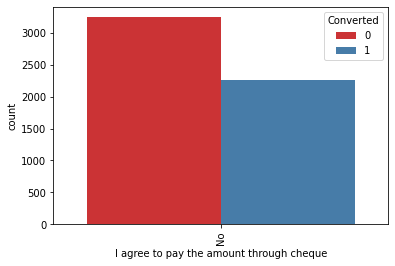

In [82]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [83]:
Observation- The data shows mostly no hence we can not conclusion from this.

SyntaxError: ignored

### 26) A free copy of Mastering The Interview

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

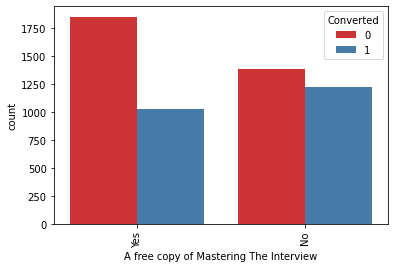

In [84]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [85]:
Observation- The data shows mostly no hence we can not conclusion from this.

SyntaxError: ignored

### 27) Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Email Opened'),
  Text(1, 0, 'Modified'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Link Clicked'),
  Text(4, 0, 'Unreachable'),
  Text(5, 0, 'Unsubscribed'),
  Text(6, 0, 'Had a Phone Conversation'),
  Text(7, 0, 'Olark Chat Conversation'),
  Text(8, 0, 'Email Bounced'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'View in browser link Clicked'),
  Text(12, 0, 'Form Submitted on Website'),
  Text(13, 0, 'Email Received'),
  Text(14, 0, 'Email Marked Spam')])

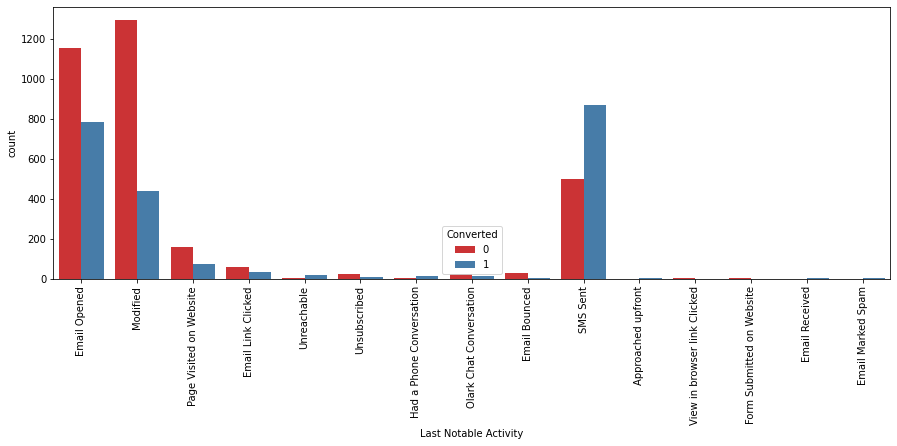

In [86]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = Lead_data,palette='Set1')
plt.xticks(rotation = 90)

### Results

In [87]:
Based upon the univerative analysis we have seen some columns are not adding any information to the model hence we can drop the model for further analysis

SyntaxError: ignored

In [88]:
Lead_data = Lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [89]:
Lead_data.shape

(5499, 14)

In [90]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5499 entries, 2 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      5499 non-null   object 
 1   Lead Origin                      5499 non-null   object 
 2   Lead Source                      5499 non-null   object 
 3   Do Not Email                     5499 non-null   object 
 4   Do Not Call                      5499 non-null   object 
 5   Converted                        5499 non-null   int64  
 6   TotalVisits                      5499 non-null   float64
 7   Total Time Spent on Website      5499 non-null   int64  
 8   Page Views Per Visit             5499 non-null   float64
 9   Last Activity                    5499 non-null   object 
 10  Specialization                   5499 non-null   object 
 11  What is your current occupation  5499 non-null   object 
 12  City                

# DATA PREPARATION

In [91]:

### Now converting some binary varieble  in Yes or No either 1/0

In [92]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

Lead_data[vars] = Lead_data[vars].apply(binary_map)

In [93]:

### now we create dummy variable for the categorical features

In [94]:

###  Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(Lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']],drop_first = True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:

### Concatenating the dummy_data to the lead_data dataframe
Lead_data = pd.concat([Lead_data, dummy_data], axis=1)
Lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,...,0,0,0,1,0,0,0,0,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0


In [96]:
### now we forword to dropping the column for which dummies were created

In [97]:
Lead_data = Lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [98]:

Lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,0,0,1,2.0,1640,2.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,0,0,0,2.0,71,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
### splitting the data into train  and  test set.


In [100]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = Lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,0,0,2.0,1640,2.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8,0,0,2.0,71,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
# Putting target variable to y
y = Lead_data['Converted']

y.head()

2    1
3    0
4    1
6    1
8    0
Name: Converted, dtype: int64

In [102]:
### Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [103]:
### Scaling the features

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6567,0,0,-1.563512,-1.112437,-1.826045,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3060,0,0,-0.086350,1.733661,0.572501,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5019,0,0,0.652231,2.471741,-0.926590,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2161,0,0,0.282940,2.052336,1.172138,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9076,0,0,-0.086350,1.821571,0.572501,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [105]:
#### now the  Checking the Lead Conversion rate
Convert = (sum(Lead_data['Converted'])/len(Lead_data['Converted'].index))*100
Convert

41.02564102564102

In [106]:
###  we have almost 41% lead conversion rate

# Feature Selection Using RFE

In [107]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [108]:
from sklearn.feature_selection import RFE
logreg= LogisticRegression()
rfe = RFE(estimator = logreg, step=15)
rfe = rfe.fit (X_train,y_train) 

In [109]:
rfe = RFE(logreg, step =15)             
rfe = rfe.fit(X_train, y_train)     

In [110]:

rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True])

In [111]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 3),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Others', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 4),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 4),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activit

In [112]:
### Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
  

# Model Building

In [113]:
### Assessing the model with StateModels

MODEL-1

In [114]:
import statsmodels.api as sm

In [115]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3814
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1682.0
Date:                Mon, 27 Feb 2023   Deviance:                       3363.9
Time:                        14:38:53   Pearson chi2:                 4.11e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7457      1.873      0.932      0.351      -1.925       5.416
Do Not Email                                            -1.7115      0.268     -6.379      0.000      -2.237      -1.186
Total Time Spent on Website                              1.0518      0.046     22.908      0.000       0.962       1.142
Lead Origin_Landing Page Submission                     -1.3396      0.173     -7.758      0.000      -1.678      -1.001
Lead Origin_Lead Add Form                                1.7331      1.178      1.472      0.141      -0.575       4.041
Lead Source_Olark Chat                                   0.6594      0.267      2.468      0.014       0.136       1.183
Lead Source_Reference                                    1.6394      1.242      1.320      0.187      -0.795       4.074
Lead Source_Referral Sites                               0.6057      0.522      1.161      0.246      -0.417       1.628
Lead Source_Welingak Website                            22.0914   1.97e+04      0.001      0.999   -3.87e+04    3.87e+04
Last Activity_Email Bounced                             -1.4540      0.900     -1.616      0.106      -3.218       0.310
Last Activity_Email Link Clicked                         0.4561      0.488      0.936      0.349      -0.499       1.412
Last Activity_Email Opened                               0.7491      0.216      3.467      0.001       0.326       1.172
Last Activity_Form Submitted on Website                 -0.4954      0.368     -1.345      0.178      -1.217       0.226
Last Activity_Other_Activity                             1.4295      1.017      1.406      0.160      -0.564       3.423
Last Activity_SMS Sent                                   0.4066      0.224      1.811      0.070      -0.033       0.847
Last Activity_Unreachable                                0.1205      0.520      0.232      0.817      -0.899       1.140
Last Activity_Unsubscribed                               1.5100      1.189      1.270      0.204      -0.820       3.840
Specialization_Business Administration                  -0.2808      0.176     -1.598      0.110      -0.625       0.064
Specialization_Hospitality Management                   -0.5678      0.347     -1.636      0.102      -1.248       0.112
Specialization_Retail Management                        -0.8294      0.369     -2.246      0.025      -1.553      -0.106
What is your current occupation_Housewife               22.9035   2.81e+04      0.001      0.999    -5.5e+04    5.51e+04
What is your current occupation_Other                    0.9169      1.608      0.570      0.569      -2.235       4.069
What is your current occupation_Student                 -0

In [116]:
### we observed above  Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [117]:
col1 = cols.drop('What is your current occupation_Housewife')

MODEL-2

In [118]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3815
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1683.3
Date:                Mon, 27 Feb 2023   Deviance:                       3366.5
Time:                        14:38:56   Pearson chi2:                 4.11e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.1477      1.791      1.758      0.079      -0.363       6.658
Do Not Email                                            -1.7106      0.268     -6.378      0.000      -2.236      -1.185
Total Time Spent on Website                              1.0512      0.046     22.900      0.000       0.961       1.141
Lead Origin_Landing Page Submission                     -1.3313      0.173     -7.711      0.000      -1.670      -0.993
Lead Origin_Lead Add Form                                1.7380      1.178      1.476      0.140      -0.570       4.046
Lead Source_Olark Chat                                   0.6527      0.268      2.440      0.015       0.128       1.177
Lead Source_Reference                                    1.6426      1.242      1.322      0.186      -0.792       4.077
Lead Source_Referral Sites                               0.6061      0.521      1.163      0.245      -0.416       1.628
Lead Source_Welingak Website                            21.0921    1.2e+04      0.002      0.999   -2.34e+04    2.35e+04
Last Activity_Email Bounced                             -1.4476      0.900     -1.609      0.108      -3.211       0.316
Last Activity_Email Link Clicked                         0.4631      0.487      0.950      0.342      -0.492       1.418
Last Activity_Email Opened                               0.7602      0.216      3.523      0.000       0.337       1.183
Last Activity_Form Submitted on Website                 -0.4865      0.368     -1.321      0.186      -1.208       0.235
Last Activity_Other_Activity                             1.4344      1.017      1.411      0.158      -0.558       3.427
Last Activity_SMS Sent                                   0.4118      0.225      1.834      0.067      -0.028       0.852
Last Activity_Unreachable                                0.1254      0.520      0.241      0.809      -0.894       1.145
Last Activity_Unsubscribed                               1.5138      1.188      1.274      0.203      -0.816       3.843
Specialization_Business Administration                  -0.2753      0.175     -1.570      0.116      -0.619       0.068
Specialization_Hospitality Management                   -0.5674      0.347     -1.636      0.102      -1.247       0.113
Specialization_Retail Management                        -0.8284      0.369     -2.245      0.025      -1.552      -0.105
What is your current occupation_Other                   -0.4982      1.505     -0.331      0.741      -3.448       2.451
What is your current occupation_Student                 -2.0773      1.206     -1.722      0.085      -4.442       0.287
What is your current occupation_Unemployed              -2

In [119]:
### Now we observed in  Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high, we can drop this column.

In [120]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

MODEL -3

In [121]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3816
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1683.4
Date:                Mon, 27 Feb 2023   Deviance:                       3366.8
Time:                        14:38:59   Pearson chi2:                 4.12e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.6210      1.540      2.351      0.019       0.603       6.640
Do Not Email                                            -1.7168      0.268     -6.399      0.000      -2.243      -1.191
Total Time Spent on Website                              1.0508      0.046     22.899      0.000       0.961       1.141
Lead Origin_Landing Page Submission                     -1.3316      0.173     -7.719      0.000      -1.670      -0.993
Lead Origin_Lead Add Form                                1.7373      1.178      1.475      0.140      -0.571       4.045
Lead Source_Olark Chat                                   0.6538      0.268      2.444      0.015       0.129       1.178
Lead Source_Reference                                    1.6424      1.242      1.322      0.186      -0.792       4.077
Lead Source_Referral Sites                               0.6063      0.521      1.163      0.245      -0.416       1.628
Lead Source_Welingak Website                            21.0921    1.2e+04      0.002      0.999   -2.34e+04    2.35e+04
Last Activity_Email Bounced                             -1.6560      0.862     -1.921      0.055      -3.346       0.033
Last Activity_Email Link Clicked                         0.4627      0.487      0.949      0.342      -0.493       1.418
Last Activity_Email Opened                               0.7599      0.216      3.522      0.000       0.337       1.183
Last Activity_Form Submitted on Website                 -0.4868      0.368     -1.322      0.186      -1.208       0.235
Last Activity_Other_Activity                             1.7057      0.887      1.923      0.055      -0.033       3.445
Last Activity_SMS Sent                                   0.4120      0.225      1.835      0.067      -0.028       0.852
Last Activity_Unreachable                                0.1257      0.520      0.242      0.809      -0.894       1.145
Last Activity_Unsubscribed                               1.5178      1.188      1.277      0.202      -0.811       3.847
Specialization_Business Administration                  -0.2750      0.175     -1.568      0.117      -0.619       0.069
Specialization_Hospitality Management                   -0.5664      0.347     -1.632      0.103      -1.247       0.114
Specialization_Retail Management                        -0.8323      0.369     -2.258      0.024      -1.555      -0.110
What is your current occupation_Other                   -0.4965      1.505     -0.330      0.741      -3.446       2.453
What is your current occupation_Student                 -2.0741      1.206     -1.719      0.086      -4.438       0.290
What is your current occupation_Unemployed              -2

In [122]:
### WE Concluded  On Above is Pvalue of 'What is your current occupation_Student' is very high, we can drop this column.

In [123]:
col1 = col1.drop('What is your current occupation_Student')

MODEL-4

In [124]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3817
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1685.3
Date:                Mon, 27 Feb 2023   Deviance:                       3370.5
Time:                        14:39:01   Pearson chi2:                 4.13e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7253      1.044      1.653      0.098      -0.320       3.771
Do Not Email                                            -1.7176      0.268     -6.404      0.000      -2.243      -1.192
Total Time Spent on Website                              1.0493      0.046     22.890      0.000       0.959       1.139
Lead Origin_Landing Page Submission                     -1.3437      0.172     -7.806      0.000      -1.681      -1.006
Lead Origin_Lead Add Form                                1.7242      1.177      1.464      0.143      -0.583       4.032
Lead Source_Olark Chat                                   0.6578      0.267      2.463      0.014       0.134       1.181
Lead Source_Reference                                    1.6451      1.242      1.325      0.185      -0.789       4.079
Lead Source_Referral Sites                               0.6039      0.522      1.158      0.247      -0.418       1.626
Lead Source_Welingak Website                            21.0929    1.2e+04      0.002      0.999   -2.34e+04    2.35e+04
Last Activity_Email Bounced                             -1.6721      0.860     -1.945      0.052      -3.357       0.013
Last Activity_Email Link Clicked                         0.4530      0.487      0.930      0.352      -0.501       1.407
Last Activity_Email Opened                               0.7640      0.215      3.551      0.000       0.342       1.186
Last Activity_Form Submitted on Website                 -0.4941      0.368     -1.342      0.179      -1.216       0.227
Last Activity_Other_Activity                             1.6988      0.887      1.915      0.055      -0.040       3.437
Last Activity_SMS Sent                                   0.4075      0.224      1.816      0.069      -0.032       0.847
Last Activity_Unreachable                                0.1243      0.520      0.239      0.811      -0.895       1.144
Last Activity_Unsubscribed                               1.4989      1.185      1.265      0.206      -0.824       3.822
Specialization_Business Administration                  -0.2630      0.175     -1.505      0.132      -0.606       0.080
Specialization_Hospitality Management                   -0.5702      0.347     -1.644      0.100      -1.250       0.110
Specialization_Retail Management                        -0.8357      0.369     -2.263      0.024      -1.559      -0.112
What is your current occupation_Other                    1.4183      0.984      1.441      0.150      -0.510       3.347
What is your current occupation_Unemployed              -0.5494      0.274     -2.008      0.045      -1.086      -0.013
What is your current occupation_Working Professional     2

In [125]:
### In model4 p value of 'Lead Origin_Lead Add Form' is very high, we can drop this column.

In [126]:
col1 = col1.drop('Lead Origin_Lead Add Form')

MODEL -5

In [127]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3818
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1686.6
Date:                Mon, 27 Feb 2023   Deviance:                       3373.1
Time:                        14:41:41   Pearson chi2:                 4.13e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7560      1.043      1.683      0.092      -0.289       3.801
Do Not Email                                            -1.7200      0.268     -6.409      0.000      -2.246      -1.194
Total Time Spent on Website                              1.0472      0.046     22.868      0.000       0.957       1.137
Lead Origin_Landing Page Submission                     -1.3856      0.170     -8.131      0.000      -1.720      -1.052
Lead Source_Olark Chat                                   0.6142      0.266      2.311      0.021       0.093       1.135
Lead Source_Reference                                    3.3242      0.462      7.201      0.000       2.419       4.229
Lead Source_Referral Sites                               0.5916      0.522      1.132      0.258      -0.432       1.616
Lead Source_Welingak Website                            22.7711    1.2e+04      0.002      0.998   -2.34e+04    2.35e+04
Last Activity_Email Bounced                             -1.6650      0.860     -1.937      0.053      -3.350       0.020
Last Activity_Email Link Clicked                         0.4525      0.487      0.929      0.353      -0.502       1.407
Last Activity_Email Opened                               0.7739      0.215      3.599      0.000       0.352       1.195
Last Activity_Form Submitted on Website                 -0.5012      0.368     -1.361      0.173      -1.223       0.220
Last Activity_Other_Activity                             1.7013      0.887      1.918      0.055      -0.037       3.439
Last Activity_SMS Sent                                   0.4088      0.224      1.822      0.068      -0.031       0.849
Last Activity_Unreachable                                0.1257      0.520      0.242      0.809      -0.893       1.145
Last Activity_Unsubscribed                               1.5036      1.185      1.269      0.205      -0.819       3.826
Specialization_Business Administration                  -0.2646      0.175     -1.514      0.130      -0.607       0.078
Specialization_Hospitality Management                   -0.5708      0.347     -1.645      0.100      -1.251       0.109
Specialization_Retail Management                        -0.8358      0.369     -2.263      0.024      -1.560      -0.112
What is your current occupation_Other                    1.4213      0.985      1.444      0.149      -0.508       3.351
What is your current occupation_Unemployed              -0.5466      0.274     -1.998      0.046      -1.083      -0.010
What is your current occupation_Working Professional     2.3985      0.358      6.702      0.000       1.697       3.100
Last Notable Activity_Email Link Clicked                -1

In [ ]:
### Now  checking VIF Value

In [128]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,What is your current occupation_Unemployed,29.79
22,Last Notable Activity_Email Opened,22.38
26,Last Notable Activity_SMS Sent,16.09
2,Lead Origin_Landing Page Submission,14.59
23,Last Notable Activity_Modified,14.39
9,Last Activity_Email Opened,10.14
12,Last Activity_SMS Sent,7.51
21,Last Notable Activity_Email Link Clicked,3.53
20,What is your current occupation_Working Profes...,3.49
28,Last Notable Activity_Unsubscribed,3.36


In [129]:
### We observed on vif value high column is  'What is your current occupation_Unemployed' because it has high VIF'
## So we drop the column

In [130]:
col1 = col1.drop('What is your current occupation_Unemployed')

MODEL - 6

In [131]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3819
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1688.5
Date:                Mon, 27 Feb 2023   Deviance:                       3377.1
Time:                        14:44:23   Pearson chi2:                 4.14e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1941      1.004      1.190      0.234      -0.773       3.161
Do Not Email                                            -1.7244      0.269     -6.420      0.000      -2.251      -1.198
Total Time Spent on Website                              1.0474      0.046     22.888      0.000       0.958       1.137
Lead Origin_Landing Page Submission                     -1.3807      0.170     -8.106      0.000      -1.715      -1.047
Lead Source_Olark Chat                                   0.6182      0.266      2.326      0.020       0.097       1.139
Lead Source_Reference                                    3.3810      0.461      7.339      0.000       2.478       4.284
Lead Source_Referral Sites                               0.5793      0.522      1.109      0.267      -0.444       1.603
Lead Source_Welingak Website                            22.7608    1.2e+04      0.002      0.998   -2.34e+04    2.35e+04
Last Activity_Email Bounced                             -1.6331      0.865     -1.887      0.059      -3.329       0.063
Last Activity_Email Link Clicked                         0.4486      0.489      0.918      0.359      -0.509       1.406
Last Activity_Email Opened                               0.7691      0.215      3.572      0.000       0.347       1.191
Last Activity_Form Submitted on Website                 -0.5211      0.368     -1.416      0.157      -1.243       0.200
Last Activity_Other_Activity                             1.6961      0.887      1.913      0.056      -0.042       3.434
Last Activity_SMS Sent                                   0.3954      0.224      1.764      0.078      -0.044       0.835
Last Activity_Unreachable                                0.1019      0.521      0.196      0.845      -0.918       1.122
Last Activity_Unsubscribed                               1.5399      1.194      1.290      0.197      -0.800       3.880
Specialization_Business Administration                  -0.2697      0.175     -1.544      0.123      -0.612       0.073
Specialization_Hospitality Management                   -0.5669      0.348     -1.631      0.103      -1.248       0.115
Specialization_Retail Management                        -0.8312      0.368     -2.260      0.024      -1.552      -0.110
What is your current occupation_Other                    1.9507      0.948      2.057      0.040       0.092       3.809
What is your current occupation_Working Professional     2.9303      0.240     12.208      0.000       2.460       3.401
Last Notable Activity_Email Link Clicked                -1.6641      1.141     -1.459      0.145      -3.900       0.572
Last Notable Activity_Email Opened                      -1

In [132]:
### ON Above model observed high value in  'Lead Origin_Lead Import' because it has high Pvalue

In [133]:
col1 = col1.drop('Lead Origin_Lead Import')

KeyError: ignored

MODEL -7

In [134]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3819
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1688.5
Date:                Mon, 27 Feb 2023   Deviance:                       3377.1
Time:                        14:46:07   Pearson chi2:                 4.14e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1941      1.004      1.190      0.234      -0.773       3.161
Do Not Email                                            -1.7244      0.269     -6.420      0.000      -2.251      -1.198
Total Time Spent on Website                              1.0474      0.046     22.888      0.000       0.958       1.137
Lead Origin_Landing Page Submission                     -1.3807      0.170     -8.106      0.000      -1.715      -1.047
Lead Source_Olark Chat                                   0.6182      0.266      2.326      0.020       0.097       1.139
Lead Source_Reference                                    3.3810      0.461      7.339      0.000       2.478       4.284
Lead Source_Referral Sites                               0.5793      0.522      1.109      0.267      -0.444       1.603
Lead Source_Welingak Website                            22.7608    1.2e+04      0.002      0.998   -2.34e+04    2.35e+04
Last Activity_Email Bounced                             -1.6331      0.865     -1.887      0.059      -3.329       0.063
Last Activity_Email Link Clicked                         0.4486      0.489      0.918      0.359      -0.509       1.406
Last Activity_Email Opened                               0.7691      0.215      3.572      0.000       0.347       1.191
Last Activity_Form Submitted on Website                 -0.5211      0.368     -1.416      0.157      -1.243       0.200
Last Activity_Other_Activity                             1.6961      0.887      1.913      0.056      -0.042       3.434
Last Activity_SMS Sent                                   0.3954      0.224      1.764      0.078      -0.044       0.835
Last Activity_Unreachable                                0.1019      0.521      0.196      0.845      -0.918       1.122
Last Activity_Unsubscribed                               1.5399      1.194      1.290      0.197      -0.800       3.880
Specialization_Business Administration                  -0.2697      0.175     -1.544      0.123      -0.612       0.073
Specialization_Hospitality Management                   -0.5669      0.348     -1.631      0.103      -1.248       0.115
Specialization_Retail Management                        -0.8312      0.368     -2.260      0.024      -1.552      -0.110
What is your current occupation_Other                    1.9507      0.948      2.057      0.040       0.092       3.809
What is your current occupation_Working Professional     2.9303      0.240     12.208      0.000       2.460       3.401
Last Notable Activity_Email Link Clicked                -1.6641      1.141     -1.459      0.145      -3.900       0.572
Last Notable Activity_Email Opened                      -1

In [135]:
#### Checking VIF Value

In [136]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,14.41
21,Last Notable Activity_Email Opened,14.12
25,Last Notable Activity_SMS Sent,10.36
9,Last Activity_Email Opened,10.10
12,Last Activity_SMS Sent,7.47
22,Last Notable Activity_Modified,6.93
14,Last Activity_Unsubscribed,3.27
27,Last Notable Activity_Unsubscribed,3.23
20,Last Notable Activity_Email Link Clicked,3.14
8,Last Activity_Email Link Clicked,2.99


In [ ]:
### in Above model we drop the column is 'Last Activity_Unsubscribed'besause reduce the variables

In [137]:
col1 = col1.drop('Last Activity_Unsubscribed')

MODEL - 8

In [138]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3820
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1689.2
Date:                Mon, 27 Feb 2023   Deviance:                       3378.4
Time:                        14:48:45   Pearson chi2:                 4.14e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2008      1.002      1.198      0.231      -0.764       3.165
Do Not Email                                            -1.6887      0.266     -6.346      0.000      -2.210      -1.167
Total Time Spent on Website                              1.0467      0.046     22.878      0.000       0.957       1.136
Lead Origin_Landing Page Submission                     -1.3780      0.170     -8.092      0.000      -1.712      -1.044
Lead Source_Olark Chat                                   0.6185      0.266      2.328      0.020       0.098       1.139
Lead Source_Reference                                    3.3821      0.461      7.342      0.000       2.479       4.285
Lead Source_Referral Sites                               0.5788      0.522      1.109      0.268      -0.444       1.602
Lead Source_Welingak Website                            22.7631    1.2e+04      0.002      0.998   -2.34e+04    2.35e+04
Last Activity_Email Bounced                             -1.6741      0.863     -1.940      0.052      -3.365       0.017
Last Activity_Email Link Clicked                         0.4352      0.488      0.891      0.373      -0.522       1.392
Last Activity_Email Opened                               0.7557      0.215      3.519      0.000       0.335       1.177
Last Activity_Form Submitted on Website                 -0.5337      0.368     -1.451      0.147      -1.254       0.187
Last Activity_Other_Activity                             1.6834      0.886      1.901      0.057      -0.053       3.419
Last Activity_SMS Sent                                   0.3804      0.224      1.702      0.089      -0.058       0.819
Last Activity_Unreachable                                0.0867      0.520      0.167      0.868      -0.933       1.106
Specialization_Business Administration                  -0.2709      0.175     -1.552      0.121      -0.613       0.071
Specialization_Hospitality Management                   -0.5679      0.347     -1.635      0.102      -1.249       0.113
Specialization_Retail Management                        -0.8320      0.367     -2.264      0.024      -1.552      -0.112
What is your current occupation_Other                    1.9370      0.948      2.044      0.041       0.080       3.794
What is your current occupation_Working Professional     2.9276      0.240     12.202      0.000       2.457       3.398
Last Notable Activity_Email Link Clicked                -1.6596      1.140     -1.456      0.145      -3.893       0.574
Last Notable Activity_Email Opened                      -1.5773      0.998     -1.580      0.114      -3.534       0.380
Last Notable Activity_Modified                          -1

In [ ]:
### Now checking Vif value

In [139]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,14.40
20,Last Notable Activity_Email Opened,14.09
24,Last Notable Activity_SMS Sent,10.34
9,Last Activity_Email Opened,10.06
12,Last Activity_SMS Sent,7.42
21,Last Notable Activity_Modified,6.91
19,Last Notable Activity_Email Link Clicked,3.14
8,Last Activity_Email Link Clicked,2.98
0,Do Not Email,1.99
7,Last Activity_Email Bounced,1.89


In [141]:
### on above model we droping column  'Last Notable Activity_Unreachable' to reduce the variables

In [142]:
col1 = col1.drop('Last Notable Activity_Unreachable')

MODEL-9

In [143]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3849
Model:                            GLM   Df Residuals:                     3821
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1689.6
Date:                Mon, 27 Feb 2023   Deviance:                       3379.1
Time:                        14:51:02   Pearson chi2:                 4.17e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8763      0.666      2.817      0.005       0.571       3.182
Do Not Email                                            -1.6957      0.267     -6.361      0.000      -2.218      -1.173
Total Time Spent on Website                              1.0467      0.046     22.884      0.000       0.957       1.136
Lead Origin_Landing Page Submission                     -1.3773      0.170     -8.094      0.000      -1.711      -1.044
Lead Source_Olark Chat                                   0.6235      0.266      2.348      0.019       0.103       1.144
Lead Source_Reference                                    3.3784      0.460      7.341      0.000       2.476       4.280
Lead Source_Referral Sites                               0.5814      0.520      1.118      0.263      -0.438       1.600
Lead Source_Welingak Website                            22.7638    1.2e+04      0.002      0.998   -2.34e+04    2.35e+04
Last Activity_Email Bounced                             -2.0439      0.808     -2.530      0.011      -3.627      -0.461
Last Activity_Email Link Clicked                         0.4348      0.488      0.890      0.373      -0.522       1.392
Last Activity_Email Opened                               0.7555      0.215      3.518      0.000       0.335       1.176
Last Activity_Form Submitted on Website                 -0.5345      0.368     -1.453      0.146      -1.255       0.186
Last Activity_Other_Activity                             1.3677      0.820      1.667      0.095      -0.240       2.975
Last Activity_SMS Sent                                   0.3807      0.224      1.703      0.089      -0.057       0.819
Last Activity_Unreachable                                0.2514      0.469      0.536      0.592      -0.668       1.171
Specialization_Business Administration                  -0.2714      0.175     -1.555      0.120      -0.614       0.071
Specialization_Hospitality Management                   -0.5690      0.347     -1.638      0.101      -1.250       0.112
Specialization_Retail Management                        -0.8330      0.368     -2.266      0.023      -1.554      -0.112
What is your current occupation_Other                    1.9383      0.948      2.045      0.041       0.081       3.796
What is your current occupation_Working Professional     2.9322      0.240     12.225      0.000       2.462       3.402
Last Notable Activity_Email Link Clicked                -2.3355      0.859     -2.720      0.007      -4.018      -0.653
Last Notable Activity_Email Opened                      -2.2535      0.659     -3.418      0.001      -3.546      -0.961
Last Notable Activity_Modified                          -2

In [144]:
#### Checking VIF Value

In [145]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [146]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,13.99
20,Last Notable Activity_Email Opened,13.69
24,Last Notable Activity_SMS Sent,10.04
9,Last Activity_Email Opened,9.98
12,Last Activity_SMS Sent,7.37
21,Last Notable Activity_Modified,6.54
19,Last Notable Activity_Email Link Clicked,3.12
8,Last Activity_Email Link Clicked,2.98
0,Do Not Email,1.99
7,Last Activity_Email Bounced,1.88


 the Pvalues of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 12 variables in our final model.

MAKING PREDICTION OF THE TRAIN SET

In [147]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6567    0.932496
3060    0.886752
5019    0.996867
2161    0.916180
9076    0.978955
8705    0.199579
8197    0.813849
2561    0.168927
4868    0.972091
2867    0.168815
dtype: float64

In [148]:
### Now reshaping into array

In [149]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.93249606, 0.88675176, 0.99686724, 0.91617984, 0.97895454,
       0.19957897, 0.81384918, 0.1689274 , 0.97209093, 0.16881544])

Now we Creating a dataframe with the actual Converted flag and the predicted probabilities

In [150]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.932496,6567
1,1,0.886752,3060
2,1,0.996867,5019
3,1,0.916180,2161
4,1,0.978955,9076


Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels




Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [151]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.932496,6567,1
1,1,0.886752,3060,1
2,1,0.996867,5019,1
3,1,0.916180,2161,1
4,1,0.978955,9076,1


Confusion Matrix

In [152]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2007  294]
 [ 492 1056]]


In [154]:
## We conclued on above metrics
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        2007      294
# converted            492       1056  

In [155]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.7957911145752143


now we find matrics simply accurency

In [156]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [157]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6821705426356589


In [158]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8722294654498044


In [159]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.12777053455019557


In [160]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7822222222222223


In [162]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8031212484993998


We found out that our specificity was good (~80%) but our sensitivity was only 70%. Hence, this needed to be taken care of.
We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

In [163]:
### Now ploting the ROC Curve

In [164]:
##  An ROC curve demonstrates several things:
## It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
## The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
## The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [172]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [173]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

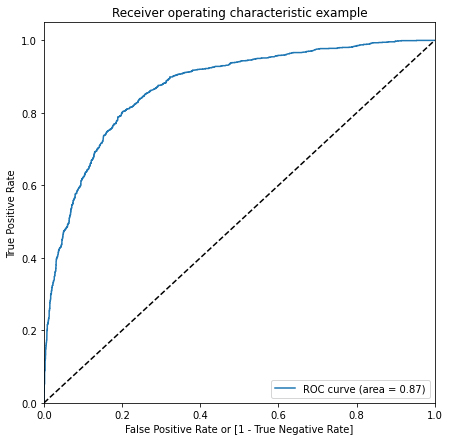

In [174]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [170]:
### we observed on above roc curve graph we get  higher (0.87) area under the ROC curve , therefore our model is a good one.

###Finding Optimal Cutoff Point
### Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that.
### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [171]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.932496,6567,1,1,1,1,1,1,1,1,1,1,1
1,1,0.886752,3060,1,1,1,1,1,1,1,1,1,1,0
2,1,0.996867,5019,1,1,1,1,1,1,1,1,1,1,1
3,1,0.916180,2161,1,1,1,1,1,1,1,1,1,1,1
4,1,0.978955,9076,1,1,1,1,1,1,1,1,1,1,1


In [175]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.


In [177]:
cut_off_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

In [178]:
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

In [182]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cut_off_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cut_off_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.402182  1.000000  0.000000
0.1   0.1  0.553390  0.978036  0.267710
0.2   0.2  0.741491  0.913437  0.625815
0.3   0.3  0.774487  0.873385  0.707953
0.4   0.4  0.801507  0.789406  0.809648
0.5   0.5  0.795791  0.682171  0.872229
0.6   0.6  0.783061  0.593669  0.910474
0.7   0.7  0.759418  0.493540  0.938288
0.8   0.8  0.731359  0.377261  0.969578
0.9   0.9  0.688750  0.245478  0.986962


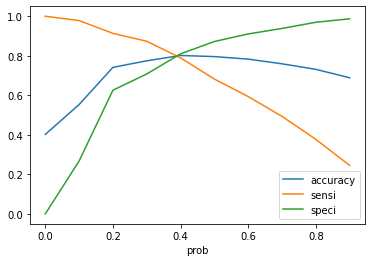

In [184]:
# Now we see on plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [185]:
### We get the cut off on above plotting 0.38 is the optimum point to take it as a cutoff probability.

In [186]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.932496,6567,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.886752,3060,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.996867,5019,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.916180,2161,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.978955,9076,1,1,1,1,1,1,1,1,1,1,1,1


Assigning Lead Score to the Training data

In [187]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.932496,6567,1,1,1,1,1,1,1,1,1,1,1,1,93
1,1,0.886752,3060,1,1,1,1,1,1,1,1,1,1,0,1,89
2,1,0.996867,5019,1,1,1,1,1,1,1,1,1,1,1,1,100
3,1,0.916180,2161,1,1,1,1,1,1,1,1,1,1,1,1,92
4,1,0.978955,9076,1,1,1,1,1,1,1,1,1,1,1,1,98


MODEL EVALUSION

In [188]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.787737074564822


In [189]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1731,  570],
       [ 247, 1301]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives/



In [190]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6821705426356589


In [226]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8722294654498044


In [191]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.12777053455019557


In [192]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7822222222222223


In [193]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2007,  294],
       [ 492, 1056]])

In [194]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7822222222222223


In [195]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6821705426356589


Using sklearn utilities for the same

In [197]:
from sklearn.metrics import precision_score, recall_score

In [198]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7822222222222223


In [199]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.6821705426356589


Precision and recall tradeoff

In [200]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       1
 3       1
 4       1
        ..
 3844    0
 3845    1
 3846    1
 3847    0
 3848    0
 Name: Converted, Length: 3849, dtype: int64, 0       1
 1       1
 2       1
 3       1
 4       1
        ..
 3844    0
 3845    1
 3846    0
 3847    0
 3848    0
 Name: predicted, Length: 3849, dtype: int64)

In [201]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

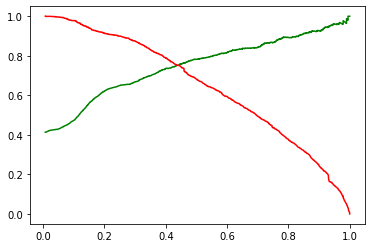

In [202]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [203]:
### The above graph shows the trade-off between the Precision and Recall 

Making predictions on the test set
Scaling the test data

In [204]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [205]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,...,What is your current occupation_Other,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1080,0,-0.832223,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4012,0,0.772141,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8285,0,-0.969583,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7858,0,-0.881673,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9138,0,-0.423806,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [206]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1080    0.517137
4012    0.452442
8285    0.086642
7858    0.667708
9138    0.143800
8722    0.357620
5601    0.002003
1740    0.322135
7604    0.068073
3113    0.997589
dtype: float64

In [207]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [208]:
# Let's see the head
y_pred_1.head()

,0
1080,0.517137
4012,0.452442
8285,0.086642
7858,0.667708
9138,0.143800


In [209]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [210]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [211]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [212]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [213]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,1080,0.517137
1,1,4012,0.452442
2,0,8285,0.086642
3,1,7858,0.667708
4,1,9138,0.143800


In [214]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [215]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [217]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,1080,0,0.517137
1,4012,1,0.452442
2,8285,0,0.086642
3,7858,1,0.667708
4,9138,1,0.143800


In [218]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [219]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,1080,0,0.517137,1
1,4012,1,0.452442,1
2,8285,0,0.086642,0
3,7858,1,0.667708,1
4,9138,1,0.143800,0


In [220]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7927272727272727


In [221]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[711, 231],
       [111, 597]])

In [222]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6821705426356589


In [223]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8722294654498044


In [224]:
#### Assigning Lead Score to the Testing data

In [225]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,1080,0,0.517137,1,52
1,4012,1,0.452442,1,45
2,8285,0,0.086642,0,9
3,7858,1,0.667708,1,67
4,9138,1,0.143800,0,14


Observations:
After running the model on the Test Data , we obtain:

Accuracy : 79.2 %
Sensitivity : 68.2 %
Specificity : 87.2 %

Results :-

1) Comparing the values obtained for Train & Test:
Train Data:
Accuracy : 78.7 %
Sensitivity : 68.2 %
Specificity : 87.2 %
Test Data:
Accuracy : 79.2 %
Sensitivity : 68.2 %
Specificity : 87.2 %
Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.